In [1]:
!pip install serpapi

In [2]:
!pip install requests beautifulsoup4 pandas serpapi


In [3]:
!pip install google-search-results

### The following code searches Google Scholar for articles on "carbon emission of AI," extracts the titles, descriptions, and URLs from the search results, and saves this information to a CSV file using serpapi

In [19]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from serpapi import GoogleSearch
import warnings

# Suppress warnings about character decoding issues
warnings.filterwarnings('ignore', message='Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.')

# Your SerpApi API key
SERP_API_KEY = "d99d2436d6ccbacb0d6625e19fd27496aa2e928bf5052449c00133b2a508c7d2"

# Define search parameters
params = {
    "api_key": SERP_API_KEY,
    "engine": "google_scholar",
    "q": "carbon emission of AI",
    "hl": "en",
    "num": 100
}

# Perform the search
try:
    search = GoogleSearch(params)
    results = search.get_dict()
    organic_results = results.get('organic_results', [])
except Exception as e:
    print(f"Error performing search: {e}")
    organic_results = []

# Extract URLs from search results
urls = [result['link'] for result in organic_results if 'link' in result]

# Prepare a list to hold all articles
all_articles = []

# Extract data from each URL
for url in urls:
    try:
        response = requests.get(url)
        response.raise_for_status()
        soup = BeautifulSoup(response.content, 'html.parser')

        title_tag = soup.find('title')
        title = title_tag.get_text(strip=True) if title_tag else 'No Title'
        
        description_tag = soup.find('meta', attrs={'name': 'description'}) or soup.find('p')
        description = description_tag['content'] if description_tag and description_tag.has_attr('content') else description_tag.get_text(strip=True) if description_tag else 'No Description'

        article_info = {
            'title': title,
            'description': description,
            'url': url
        }
        all_articles.append(article_info)
    except requests.exceptions.RequestException:
        pass  # Suppress the error message and continue
    except Exception:
        pass  # Suppress the error message and continue

# Convert the list of articles to a DataFrame
df = pd.DataFrame(all_articles)

# Display the DataFrame
print(df.head(10))

# Save the DataFrame to a CSV file
df.to_csv('carbon_emission_ai_articles.csv', index=False)


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


                                               title  \
0  Energies | Free Full-Text | Do Artificial Inte...   
1  [2405.12843] OpenCarbonEval: A Unified Carbon ...   
2  eco2AI: Carbon Emissions Tracking of Machine L...   
3                                           No Title   
4  Carbon Emission and Plastic Pollution: How Cir...   
5  Sustainability | Free Full-Text | Is There a C...   
6  Sustainable AI: AI for sustainability and the ...   
7  Frontiers | Heterogeneous impact of artificial...   
8  Atmosphere | Free Full-Text | Predicting CO2 E...   
9  Optimizing carbon emission reduction strategie...   

                                         description  \
0  A growing number of countries worldwide have c...   
1                               Help|Advanced Search   
2  The size and complexity of deep neural network...   
3                                     No Description   
4  What drives growth becomes cancerous when it g...   
5  While artificial intelligence (AI) has had a

### The following code downloads the English stopwords from the NLTK library and prints the set of these stopwords.

In [20]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'above', 'm', 'only', "mustn't", 'him', 'wasn', 'own', 'so', 'them', 'against', 'not', "shan't", 'be', 'that', 'yourself', 'with', "you'd", 'ourselves', 'during', 'd', 'yourselves', 'these', 'few', 'have', "weren't", 'below', 'being', 'myself', 'of', 'over', "you'll", 'through', 'most', "that'll", 'when', 'out', 'ours', "needn't", 'hasn', 'doing', 'and', 'did', "couldn't", 'until', 'll', 'their', 'an', 'if', 'isn', 'now', "wouldn't", 'for', 'then', 'ma', "hasn't", 'my', 'again', 'whom', "should've", 'the', 'in', 'was', 'very', 'won', 'such', 'been', 'is', 'than', 'once', 'because', 'after', 'didn', 'down', 'by', "mightn't", 'why', 'any', 'shan', 'wouldn', 'on', "isn't", 'theirs', 'do', "don't", 'both', 'more', "shouldn't", 'as', 'further', "you've", 'just', 'what', 'your', 'haven', 'you', 'shouldn', "doesn't", 'before', 'all', 'aren', 'into', 'she', 'having', 'a', 'but', "didn't", 'were', 't', 'himself', "won't", 'can', 'no', 'his', 'same', 'mightn', 'off', 'weren', 'does', 'under', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mouni\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
import regex as re
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)


In [22]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]


In [23]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens


In [24]:
df['tokens'] = df['title'].apply(prepare, pipeline=pipeline)

In [25]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, 
orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
|,10
carbon,7
ai,7
emission,6
artificial,4
intelligence,4
free,3
full-text,3
sustainability,3


## Word cloud

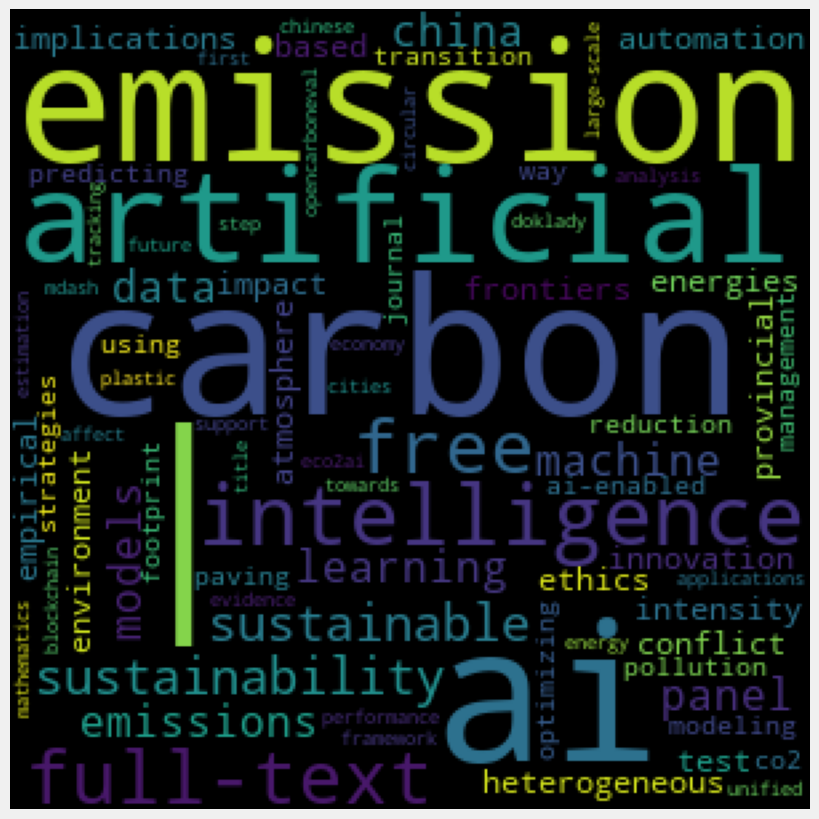

In [26]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='black', width = 300, height=300, 
margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

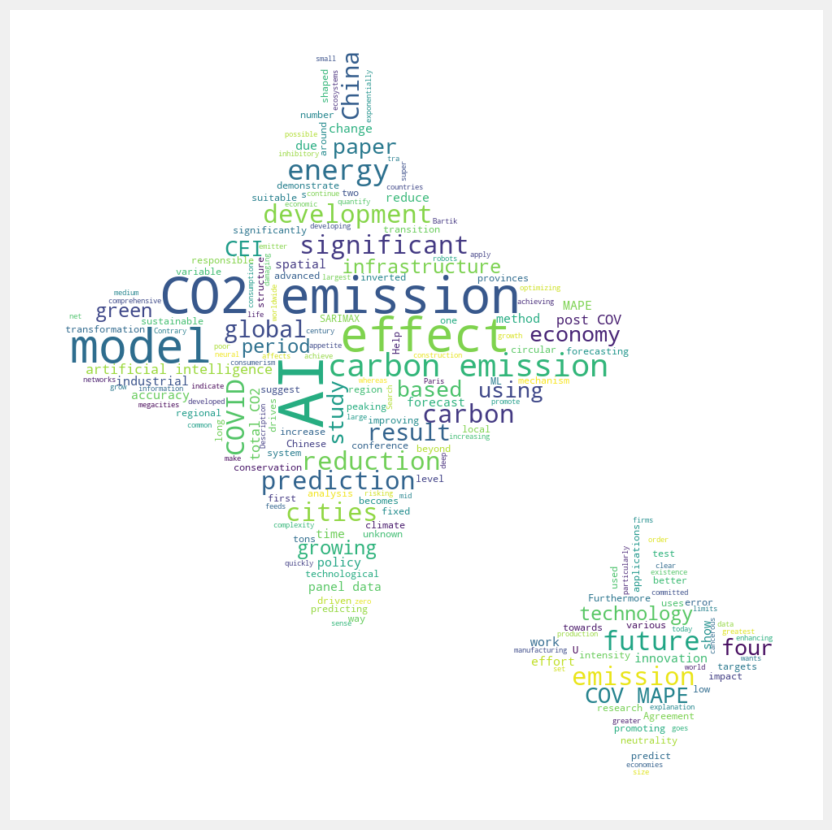

In [97]:
# Concatenate all descriptions into a single string
text = " ".join(description for description in df.description)

# Load mask image
mask_image = np.array(Image.open('bard.jpg'))

# Generate word cloud with vibrant colors
wordcloud = WordCloud(background_color='white', mask=mask_image, contour_color=None, contour_width=0, colormap='viridis').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [27]:
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
 # count tokens
    counter = Counter()
    df[column].map(update)
# create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'token'
    return idf_df
idf_df = compute_idf(df)

In [28]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()


,freq,tfidf
token,,
|,10,4.566749
carbon,7,3.196725
ai,7,7.114035
emission,6,3.664954
artificial,4,4.065163


# sentiment analysis

In [29]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [30]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
df['Subjectivity'] = df['title'].apply(getSubjectivity)
df['Polarity'] = df['title'].apply(getPolarity)

#Now display data
df.head()

,title,description,url,tokens,Subjectivity,Polarity
0,Energies | Free Full-Text | Do Artificial Inte...,A growing number of countries worldwide have c...,https://www.mdpi.com/1996-1073/15/15/5730,"[energies, |, free, full-text, |, artificial, ...",0.600000,-0.066667
1,[2405.12843] OpenCarbonEval: A Unified Carbon ...,Help|Advanced Search,https://arxiv.org/abs/2405.12843,"[opencarboneval, unified, carbon, emission, es...",0.000000,0.000000
2,eco2AI: Carbon Emissions Tracking of Machine L...,The size and complexity of deep neural network...,https://link.springer.com/article/10.1134/S106...,"[eco2ai, carbon, emissions, tracking, machine,...",0.333333,0.250000
3,No Title,No Description,https://web-assets.bcg.com/28/f7/2ddf0628493d8...,[title],0.000000,0.000000
4,Carbon Emission and Plastic Pollution: How Cir...,What drives growth becomes cancerous when it g...,https://journals.fe.up.pt/index.php/jim/articl...,"[carbon, emission, plastic, pollution, circula...",1.000000,-0.600000


In [31]:
# Function to categorize polarity
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "neutral"
    else:
        return "Positive"
    
df["Insight"] = df["Polarity"].apply(getInsight)

df.head(10)

,title,description,url,tokens,Subjectivity,Polarity,Insight
0,Energies | Free Full-Text | Do Artificial Inte...,A growing number of countries worldwide have c...,https://www.mdpi.com/1996-1073/15/15/5730,"[energies, |, free, full-text, |, artificial, ...",0.600000,-0.066667,Negative
1,[2405.12843] OpenCarbonEval: A Unified Carbon ...,Help|Advanced Search,https://arxiv.org/abs/2405.12843,"[opencarboneval, unified, carbon, emission, es...",0.000000,0.000000,neutral
2,eco2AI: Carbon Emissions Tracking of Machine L...,The size and complexity of deep neural network...,https://link.springer.com/article/10.1134/S106...,"[eco2ai, carbon, emissions, tracking, machine,...",0.333333,0.250000,Positive
3,No Title,No Description,https://web-assets.bcg.com/28/f7/2ddf0628493d8...,[title],0.000000,0.000000,neutral
4,Carbon Emission and Plastic Pollution: How Cir...,What drives growth becomes cancerous when it g...,https://journals.fe.up.pt/index.php/jim/articl...,"[carbon, emission, plastic, pollution, circula...",1.000000,-0.600000,Negative
5,Sustainability | Free Full-Text | Is There a C...,While artificial intelligence (AI) has had a g...,https://www.mdpi.com/2071-1050/15/16/12437,"[sustainability, |, free, full-text, |, confli...",0.900000,-0.100000,Negative
6,Sustainable AI: AI for sustainability and the ...,While there is a growing effort towards AI for...,https://link.springer.com/article/10.1007/s436...,"[sustainable, ai, ai, sustainability, sustaina...",0.000000,0.000000,neutral
7,Frontiers | Heterogeneous impact of artificial...,"Energy conservation and emission reduction, as...",https://www.frontiersin.org/articles/10.3389/f...,"[frontiers, |, heterogeneous, impact, artifici...",0.550000,-0.250000,Negative
8,Atmosphere | Free Full-Text | Predicting CO2 E...,"Adequate CO2 is essential for vegetation, but ...",https://www.mdpi.com/2073-4433/13/11/1871,"[atmosphere, |, free, full-text, |, predicting...",0.800000,0.400000,Positive
9,Optimizing carbon emission reduction strategie...,Access SPIE's growing collection of conference...,https://www.spiedigitallibrary.org/conference-...,"[optimizing, carbon, emission, reduction, stra...",0.125000,0.000000,neutral


In [32]:
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### The code plots a bar chart showing the count of different sentiment scores from the "Insight" column of the DataFrame, with the chart titled "carbon emission Sentiment Score".

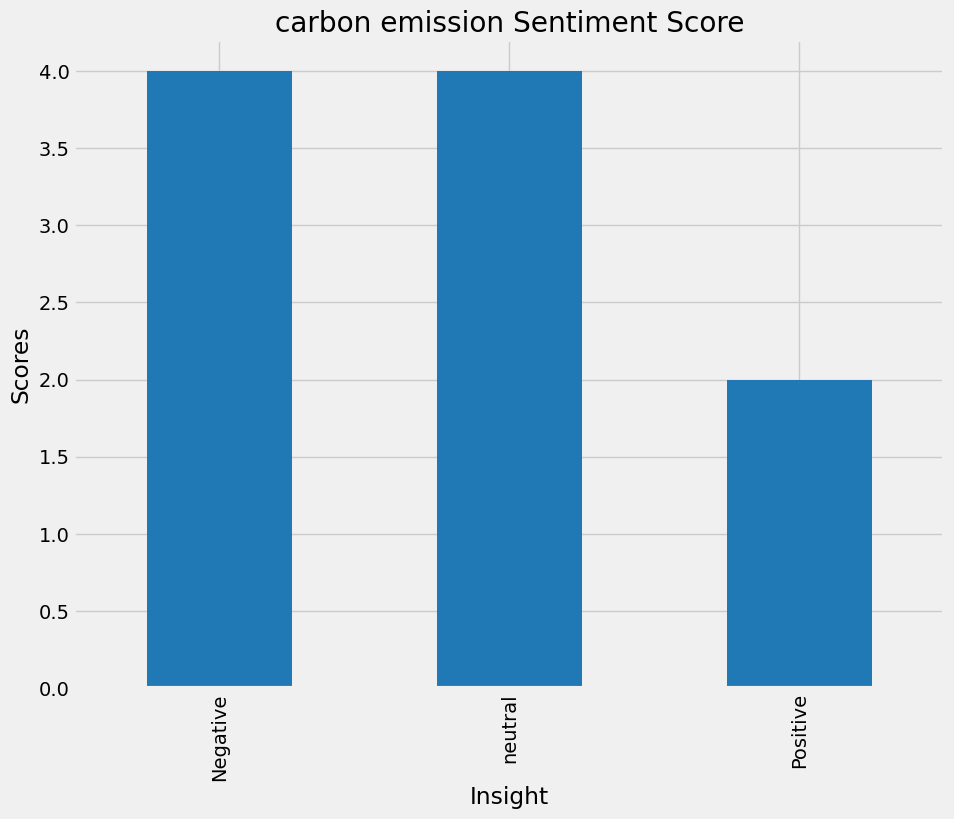

In [33]:
#Plot the values count of sentiment
plt.title("carbon emission Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Scores")
plt.rcParams["figure.figsize"] = (10,8)
df["Insight"].value_counts().plot(kind="bar", color="#2078B4")
plt.show()

## topic modeling

In [98]:
import gensim
from gensim import corpora
import pandas as pd
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

In [101]:
dictionary = corpora.Dictionary(df['tokens'])

# Filter out words that occur in less than 3 documents or more than 50% of the documents.
dictionary.filter_extremes(no_below=3, no_above=0.5)

# Create a corpus object
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Apply LDA
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

# Visualization using pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary)

# Save the visualization as an HTML file
pyLDAvis.save_html(lda_display, 'lda_visualization.html')

# Open the HTML file in a browser
import webbrowser
webbrowser.open('lda_visualization.html')

(0, '0.423*"artificial" + 0.423*"intelligence" + 0.038*"ai" + 0.038*"sustainable" + 0.038*"full-text"')
(1, '0.545*"sustainable" + 0.091*"artificial" + 0.091*"intelligence" + 0.091*"ai" + 0.091*"free"')
(2, '0.674*"ai" + 0.238*"sustainable" + 0.022*"artificial" + 0.022*"intelligence" + 0.022*"full-text"')
(3, '0.239*"intelligence" + 0.239*"artificial" + 0.239*"full-text" + 0.239*"free" + 0.022*"ai"')
(4, '0.286*"free" + 0.286*"full-text" + 0.285*"ai" + 0.048*"sustainable" + 0.048*"intelligence"')


True